In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.read_csv("/content/ADANIPORTS.csv")
df2 = pd.read_csv("/content/ONGC.csv")


In [ ]:
print("DF1 Columns:", df1.columns)
print("DF2 Columns:", df2.columns)

DF1 Columns: Index(['close', 'next_close'], dtype='object')
DF2 Columns: Index(['close', 'next_close'], dtype='object')


In [ ]:
def preprocess(df):
    df.columns = df.columns.str.strip().str.lower()

    if 'date' not in df.columns or 'close' not in df.columns:
        raise ValueError("Missing 'date' or 'close' column. Found columns: " + str(df.columns))

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    df.set_index('date', inplace=True)
    df = df[['close']]
    df['next_close'] = df['close'].shift(-1)
    return df.dropna()

# --- Apply Preprocessing ---
df1 = preprocess(df1)
df2 = preprocess(df2)

# --- Combine Datasets ---
data = pd.concat([df1, df2]).dropna()

# --- Feature Engineering (only 1 lag feature to avoid overfitting) ---
data['lag1_close'] = data['close'].shift(1)
data = data.dropna()

X = data[['lag1_close']]
y = data['next_close']

# --- Train-Test Split (no shuffling to keep time sequence) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- Model Training ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

In [ ]:
# --- Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Evaluation Metrics:
R² Score: 0.99
MAE: 4.50
RMSE: 7.44


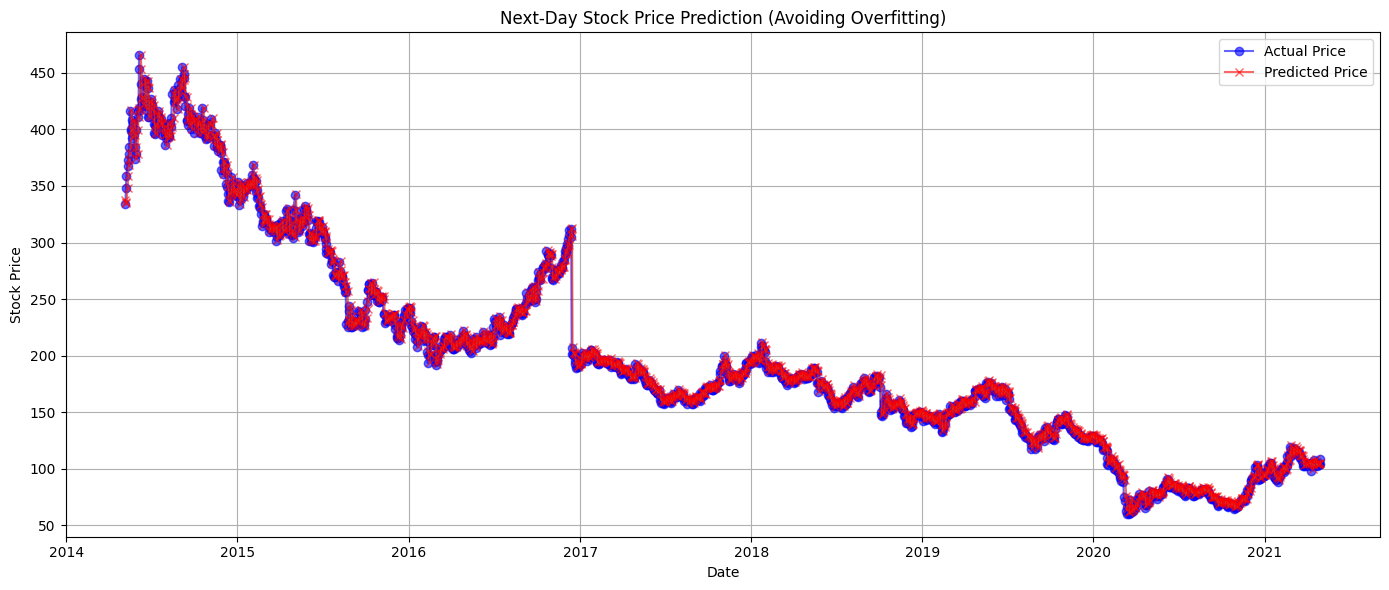

In [ ]:
# --- Visualization ---
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label="Actual Price", color='blue', marker='o', alpha=0.6)
plt.plot(y_test.index, y_pred, label="Predicted Price", color='red', marker='x', alpha=0.6)

# Add error lines
for i in range(len(y_test)):
    plt.plot([y_test.index[i], y_test.index[i]],
             [y_test.values[i], y_pred[i]],
             color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.title("Next-Day Stock Price Prediction (Avoiding Overfitting)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
